# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### Question 1.1 
Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [446]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [447]:
bank = pd.read_csv("bank_marketing_part1_Data.csv")

In [448]:
bank.head()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


|   spending  |  advance_payments  |  probability_of_full_payment  |  current_balance  |  credit_limit  |  min_payment_amt  |  max_spent_in_single_shopping | 
|--- |--- |--- |--- |--- |--- |---  |
19.94  |  16.92  |  0.8752  |  6.675  |  3.763  |  3.252  |  6.550 | 
15.99  |  14.89  |  0.9064  |  5.363  |  3.582  |  3.336  |  5.144 | 
18.95  |  16.42  |  0.8829  |  6.248  |  3.755  |  3.368  |  6.148 | 
 10.83  |  12.96  |  0.8099  |  5.278  |  2.641  |  5.182  |  5.185 | 
  17.99  |  15.86  |  0.8992  |  5.890  |  3.694  |  2.068  |  5.837   | 
  **BANK MARKETING DATA**


| Column Names  | Understanding of each Column   |
|:--- |:---  |
|spending | Amount spent by the customer per month (in 1000s)|
| advance_payments| Amount paid by the customer in advance by cash (in 100s) | 
| probability_of_full_payment| Probability of payment done in full by the customer to the bank | 
| current_balance |Balance amount left in the account to make purchases (in 1000s) | 
| credit_limit |Limit of the amount in credit card (10000s) | 
| min_payment_amt  |minimum paid by the customer while making payments for purchases made monthly (in 100s) | 
| max_spent_in_single_shopping |Maximum amount spent in one purchase (in 1000s)   | 
**Data Dictionary**

In [449]:
bank.shape

(210, 7)

- There are a total of 210 rows and 7 columns

In [450]:
round(bank.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.848,2.910,10.590,12.270,14.355,17.305,21.180
advance_payments,210.0,14.559,1.306,12.410,13.450,14.320,15.715,17.250
probability_of_full_payment,210.0,0.871,0.024,0.808,0.857,0.873,0.888,0.918
current_balance,210.0,5.629,0.443,4.899,5.262,5.524,5.980,6.675
credit_limit,210.0,3.259,0.378,2.630,2.944,3.237,3.562,4.033
min_payment_amt,210.0,3.700,1.504,0.765,2.561,3.599,4.769,8.456
max_spent_in_single_shopping,210.0,5.408,0.491,4.519,5.045,5.223,5.877,6.550


|   |    count  |  mean  |  std  |  min  |  25%  |  50%  |  75%  |  max | 
|--- |--- |--- |--- |--- |--- |--- |--- |---  |
| **spending** |  210.0  |  14.848  |  2.910  |  10.590  |  12.270  |  14.355  |  17.305  |  21.180 | 
| **advance_payments**  |  210.0  |  14.559  |  1.306  |  12.410  |  13.450  |  14.320  |  15.715  |  17.250 | 
| **probability_of_full_payment**  |  210.0  |  0.871  |  0.024  |  0.808  |  0.857  |  0.873  |  0.888  |  0.918 | 
| **current_balance**  |  210.0  |  5.629  |  0.443  |  4.899  |  5.262  |  5.524  |  5.980  |  6.675 | 
| **credit_limit**  |  210.0  |  3.259  |  0.378  |  2.630  |  2.944  |  3.237  |  3.562  |  4.033 | 
| **min_payment_amt**  |  210.0  |  3.700  |  1.504  |  0.765  |  2.561  |  3.599  |  4.769  |  8.456 | 
| **max_spent_in_single_shopping**  |  210.0  |  5.408  |  0.491  |  4.519  |  5.045  |  5.223  |  5.877  |  6.550   | 


In [451]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB




|  #  | Column                        |Non-Null Count|  Dtype   | 
| ---  |:------                        |:-------------|  -----   | 
|  0  | spending                      |210 non-null  |  float64 | 
|  1  | advance_payments              |210 non-null  |  float64 | 
|  2  | probability_of_full_payment   |210 non-null  |  float64 | 
|  4  | credit_limit                  |210 non-null  |  float64 | 
|  5  | min_payment_amt               |210 non-null  |  float64 | 
|  6  | max_spent_in_single_shopping  |210 non-null  |  float64 | 
| dtypes: float64(7)   | 


- No missing or unique characters within then data

In [452]:
bank.duplicated().sum()

0

- There are **NO** Duplicate Rows within the data

**UNIVARIATE ANALYSIS**

In [453]:
numericcolumns = list(bank.columns.values)
len(numericcolumns)

7

In [454]:
def univariate_Analysis_numeric(column,nbins):
    print("Description of " + column)
    print("\n")
    print(bank[column].describe(),end=' ')
    print("\n")
    
    plt.figure()
    print("Distribution of " + column)
    print("\n")
    sns.histplot(bank[column], kde=False, color='g');
    plt.show()
    print("\n")
    plt.figure()
    print("BoxPlot of " + column)
    print("\n")
    ax = sns.boxplot(x=bank[column])
    plt.show()

Description of spending


count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 

Distribution of spending




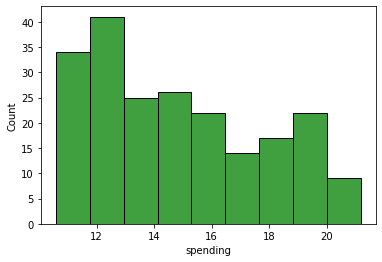



BoxPlot of spending




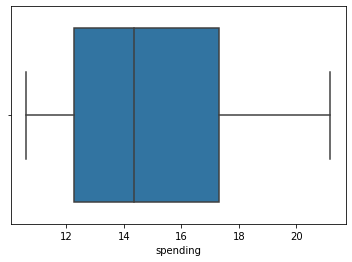

Description of advance_payments


count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 

Distribution of advance_payments




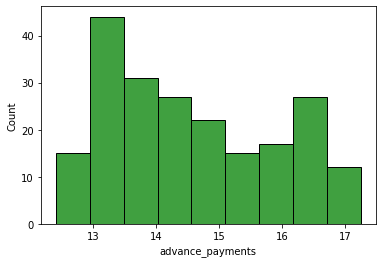



BoxPlot of advance_payments




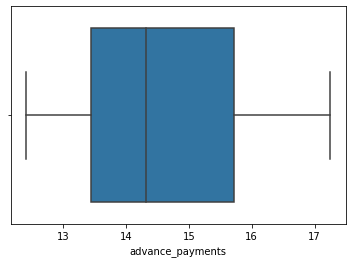

Description of probability_of_full_payment


count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 

Distribution of probability_of_full_payment




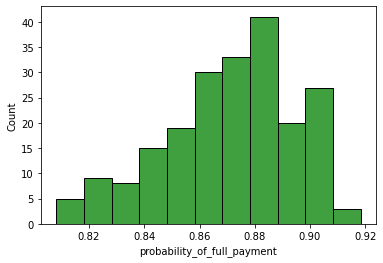



BoxPlot of probability_of_full_payment




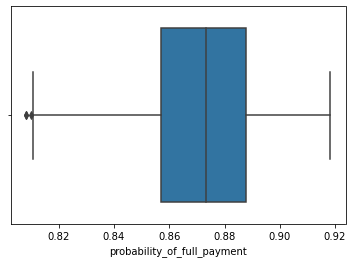

Description of current_balance


count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 

Distribution of current_balance




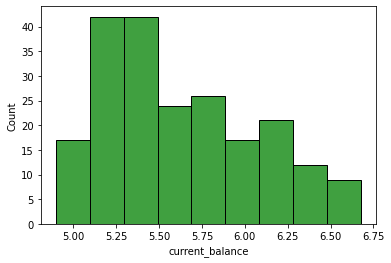



BoxPlot of current_balance




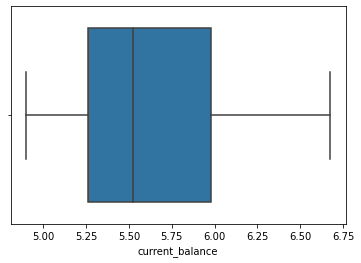

Description of credit_limit


count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 

Distribution of credit_limit




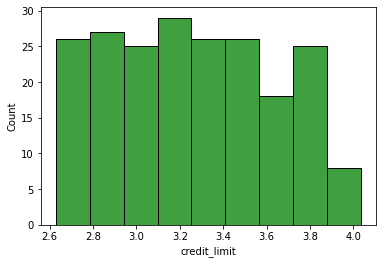



BoxPlot of credit_limit




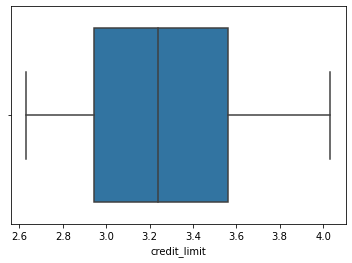

Description of min_payment_amt


count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 

Distribution of min_payment_amt




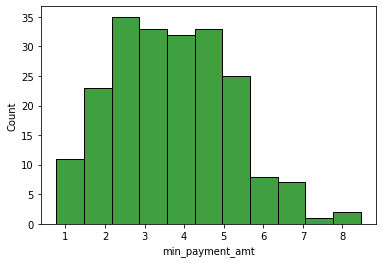



BoxPlot of min_payment_amt




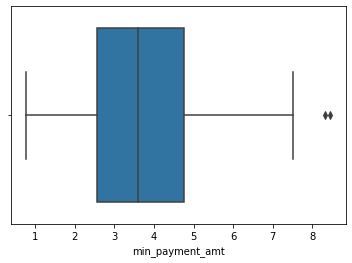

Description of max_spent_in_single_shopping


count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 

Distribution of max_spent_in_single_shopping




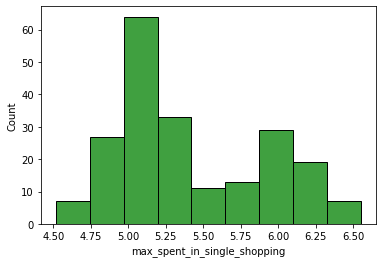



BoxPlot of max_spent_in_single_shopping




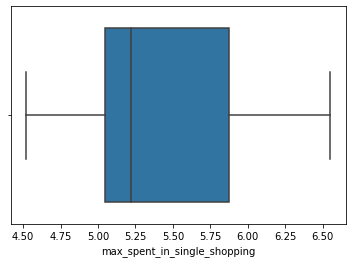

In [455]:
for x in numericcolumns:
    univariate_Analysis_numeric(x,20)

| |**Descrpition of spending**|
|--- |---  |
| mean   |   14.847524 | 
| std    |    2.909699 | 
| min     |  10.590000 | 
| 25%     |  12.270000 | 
| 50%     | 14.355000 | 
| 75%    |  17.305000 | 
| max     |  21.180000   | 

**Distribution of spending**
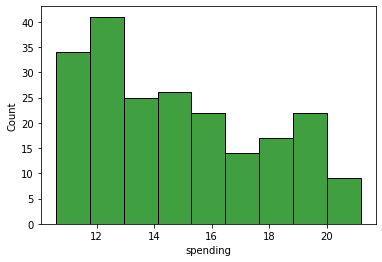
**BoxPlot of spending**
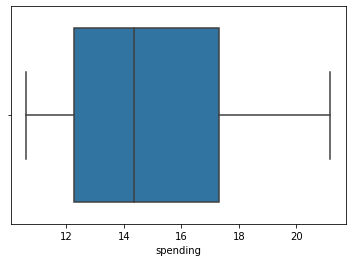

|   | Description of advance_payments   |
|--- |---  |
| mean   |   14.559286 | 
| std       | 1.305959 | 
| min      | 12.410000 | 
| 25%    |   13.450000 | 
| 50%    |   14.320000 | 
| 75%    |   15.715000 | 
| max    |   17.250000   | 

**Distribution of advance_payments**
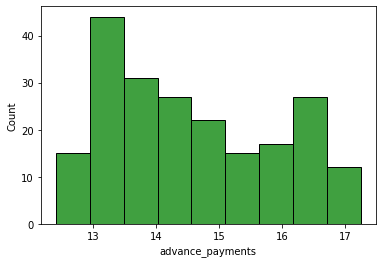
**BoxPlot of advance_payments**
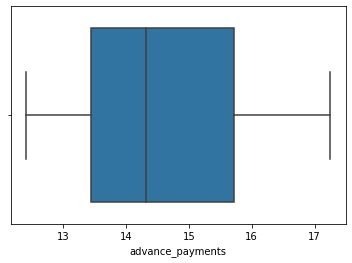

| |Description of probability_of_full_payment|
|--- |---  |
| mean  |     0.870999 | 
| std      |  0.023629 | 
| min     |   0.808100 | 
| 25%   |     0.856900 | 
| 50%   |     0.873450 | 
| 75%   |     0.887775 | 
| max   |     0.918300   | 

**Distribution of probability_of_full_payment**
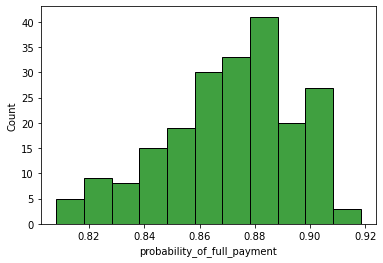
**BoxPlot of probability_of_full_payment**
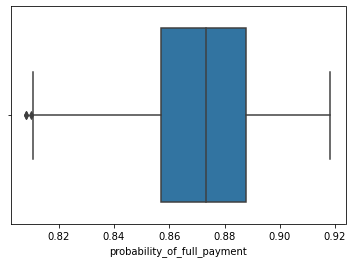

|   | Description of current_balance|
|--- |---  |
| mean  |     5.628533 | 
| std    |    0.443063 | 
| min    |    4.899000 | 
| 25%    |    5.262250 | 
| 50%    |    5.523500 | 
| 75%    |    5.979750 | 
| max    |    6.675000   | 

**Distribution of current_balance**
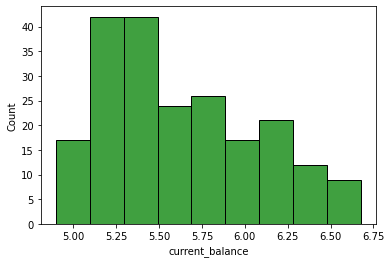
**BoxPlot of current_balance**
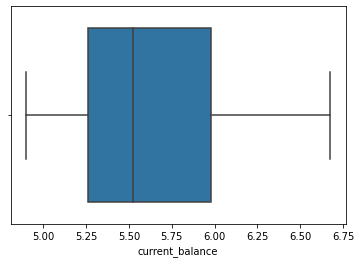

|   | Description of credit_limit   |
|--- |---  | 
| count|210.000000 | 
| mean |      3.258605 | 
| std  |      0.377714 | 
| min |       2.630000 | 
| 25% |       2.944000 | 
| 50% |       3.237000 | 
| 75%|        3.561750 | 
| max |       4.033000   | 

**Distribution of credit_limit**
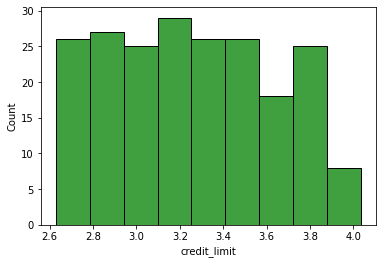
**BoxPlot of credit_limit**
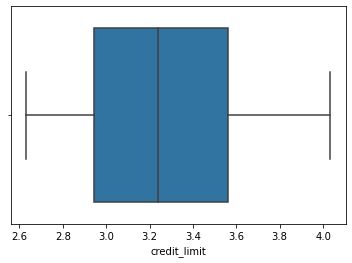

| | Description of min_payment_amt|
|--- |---  |
| count  |  210.000000 | 
| mean  |     3.700201 | 
| std      |  1.503557 | 
| min     |   0.765100 | 
| 25%   |     2.561500 | 
| 50%   |     3.599000 | 
| 75%   |     4.768750 | 
| max   |     8.456000   | 

**Distribution of min_payment_amt**
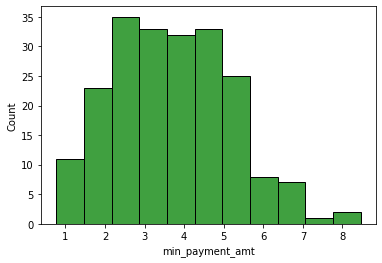
**BoxPlot of min_payment_amt**
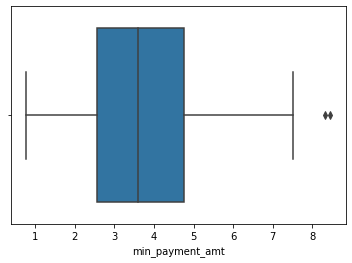

| |Description of max_spent_in_single_shopping|
|--- |---  |
| count  |  210.000000 | 
| mean   |    5.408071 | 
| std       | 0.491480 | 
| min      |  4.519000 | 
| 25%    |    5.045000 | 
| 50%    |    5.223000 | 
| 75%    |    5.877000 | 
| max     |   6.550000   | 

**Distribution of max_spent_in_single_shopping**
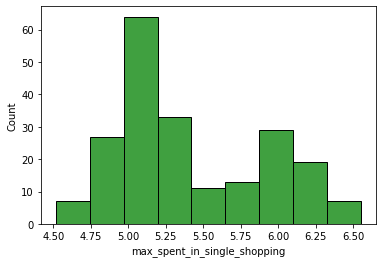
**BoxPlot of max_spent_in_single_shopping**
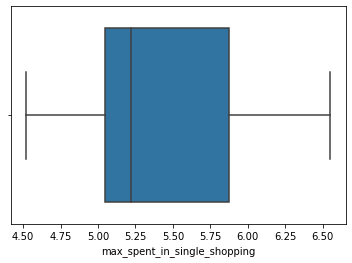

**Bi-Variate Analysis**

In [456]:
corr = bank.corr(method='pearson')

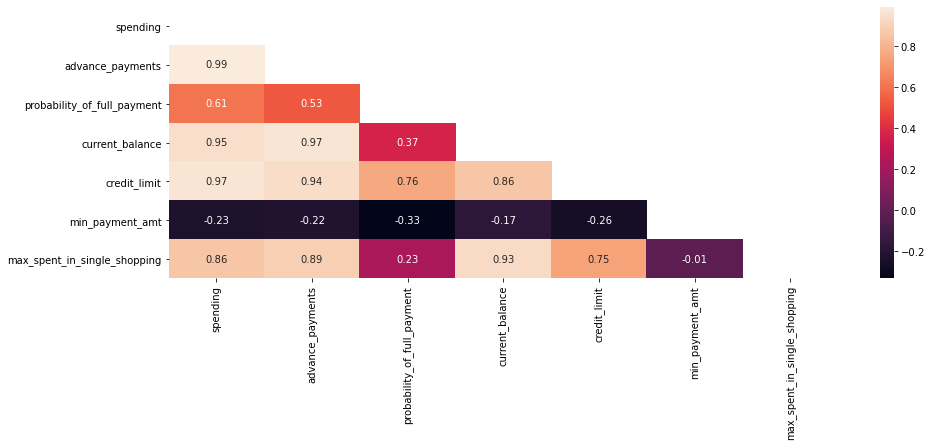

In [457]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(15, 5))
sns.heatmap(bank.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

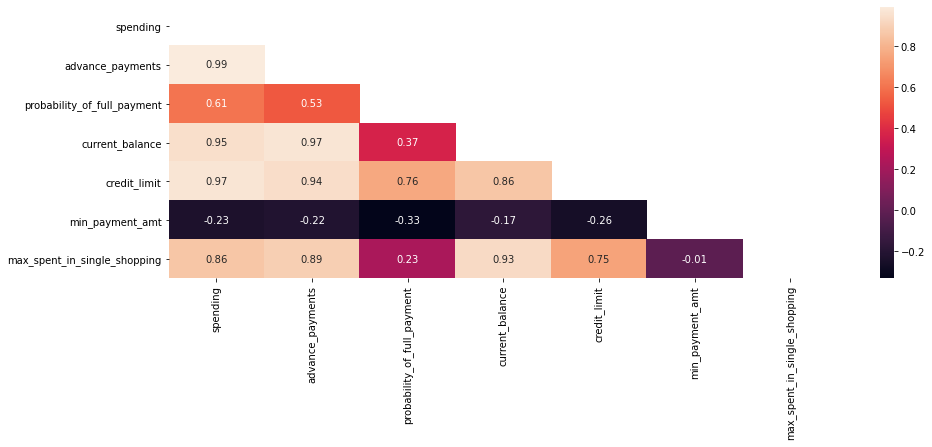
**Heat Map of the Data showing Coorelations between Variables**

**Multi-Variate Analysis**

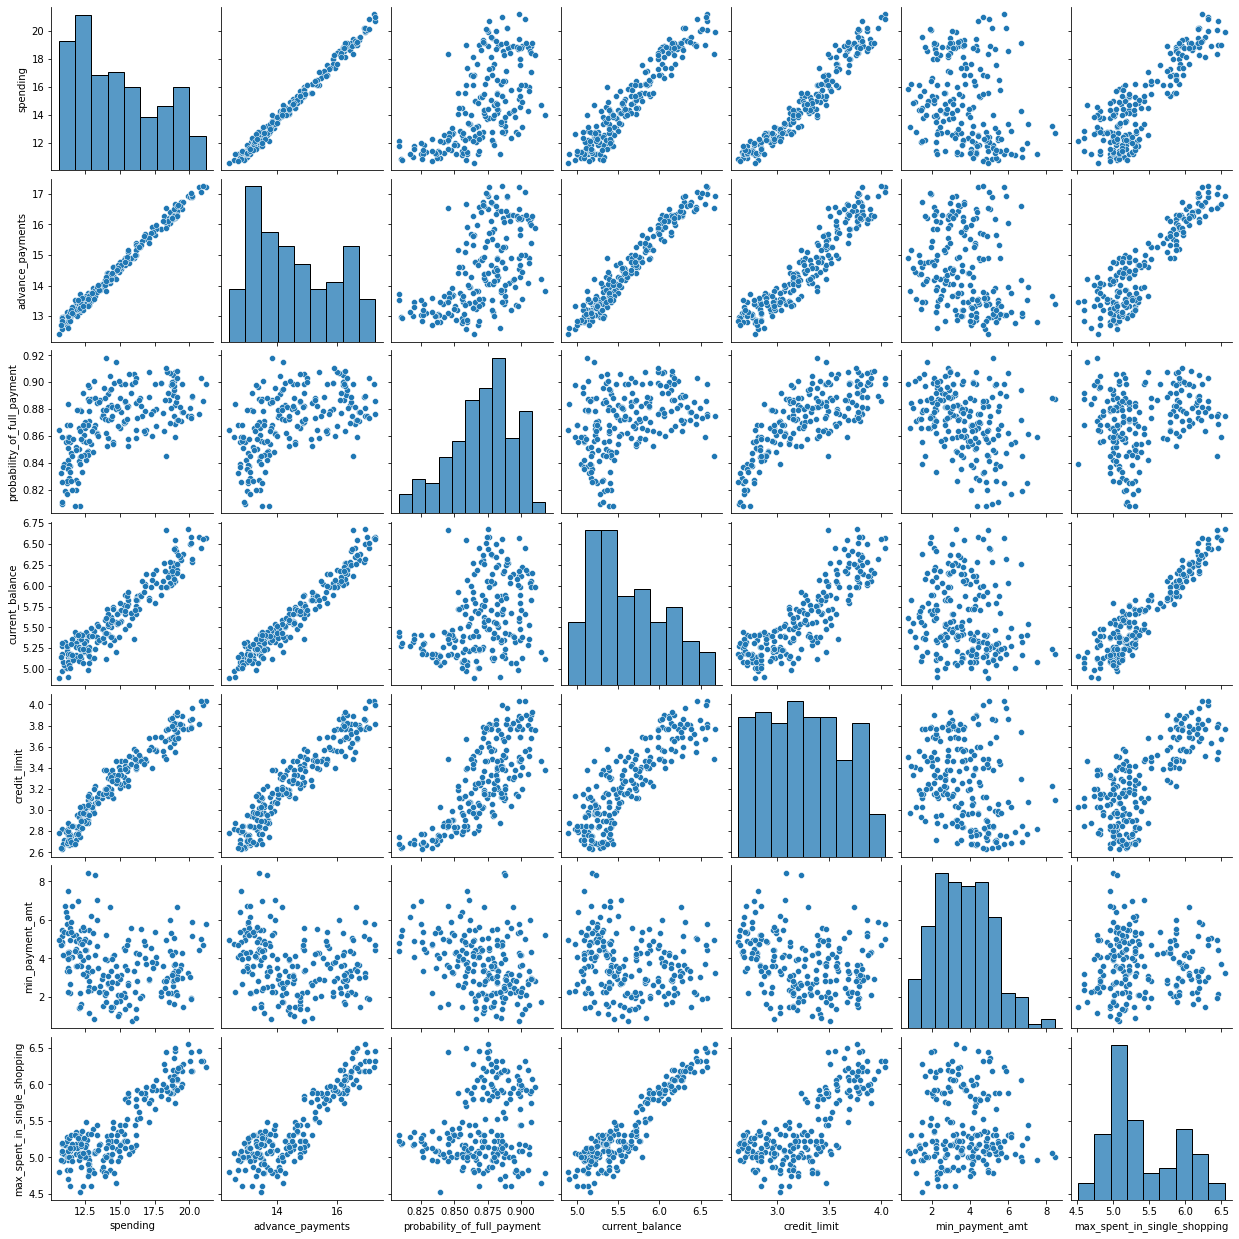

In [458]:
sns.pairplot(data=bank);

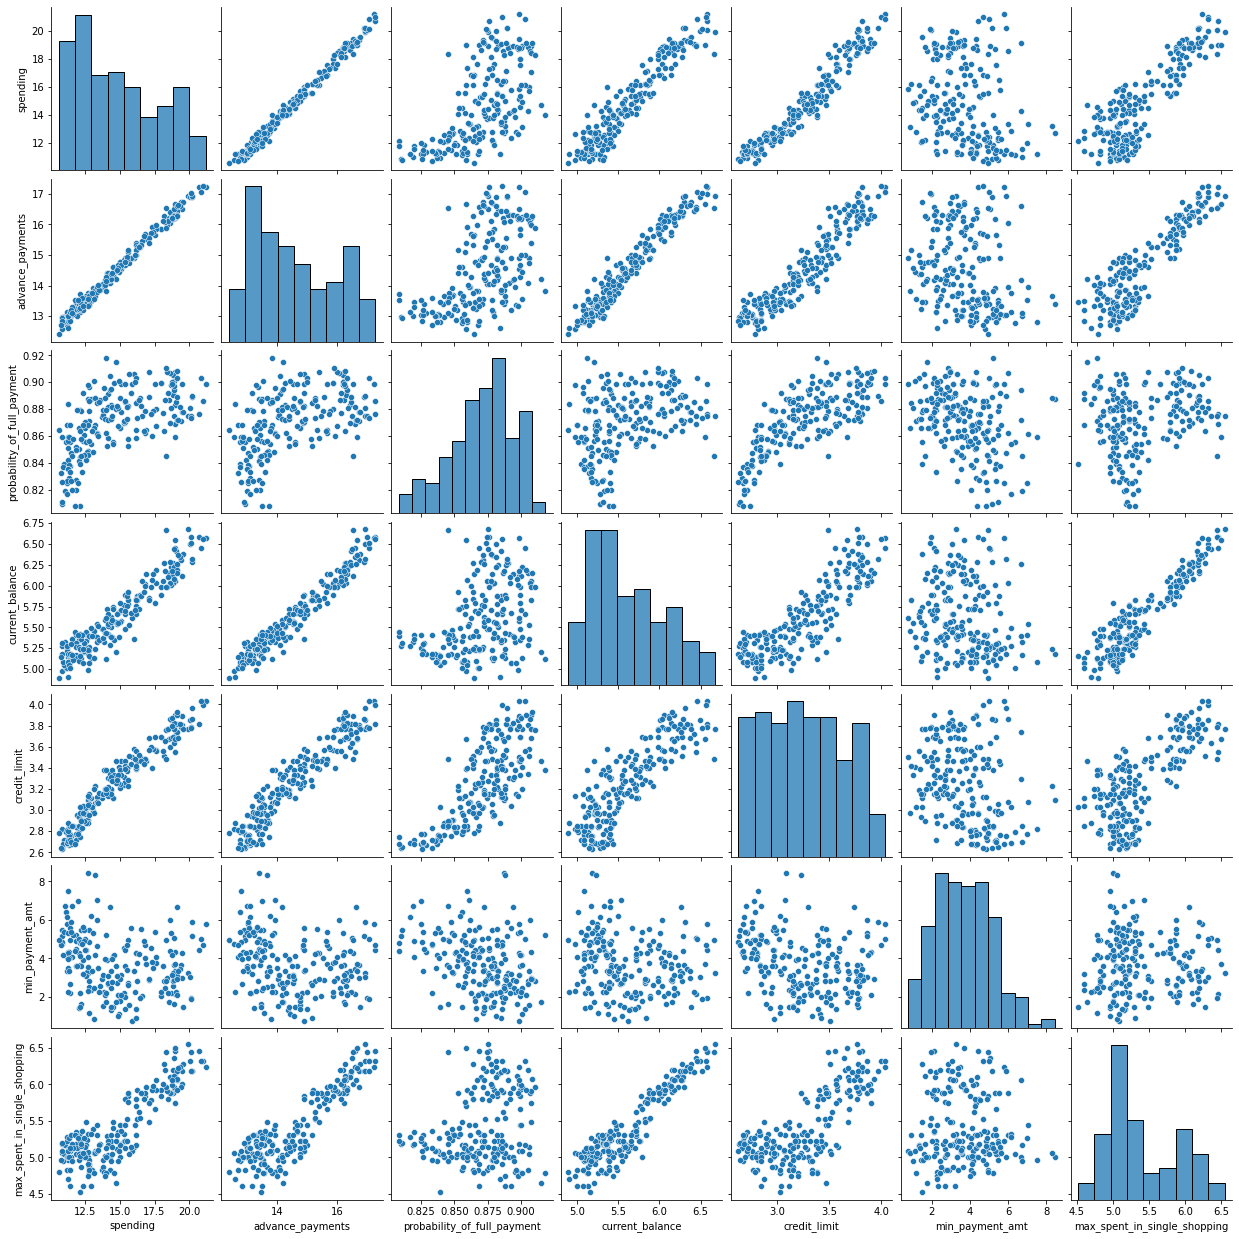
**PAirPlot Among Variables**

### Question 1.2  
Do you think scaling is necessary for clustering in this case? Justify

In [459]:
from sklearn.preprocessing import StandardScaler

In [460]:
X = StandardScaler()

In [461]:
bank_scaled = X.fit_transform(bank)

- Scaling is necessary in this case as Dataset has features with different "weights".
- As per the Data Dictionary we see that each column is not measured / observed with the same Weights as the other. So when Data is considered without scaling then more weightage will go to the data with more value even thought its of less importance in some case.
- Here we use Standard Scalare from Sk Learn Preprocessing. StandardScaler removes the mean and scales each feature/variable to unit variance.

### Question 1.3 
Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

#### Creating the Dendrogram


In [462]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [463]:
link_method = linkage(bank_scaled, method = 'average')

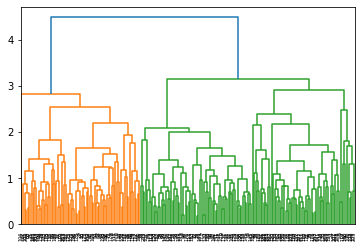

In [464]:
dend = dendrogram(link_method)

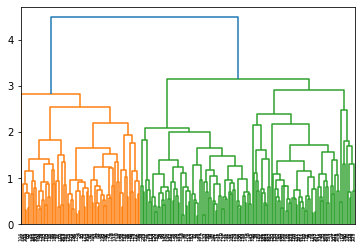
**Dendogram without Trancating**

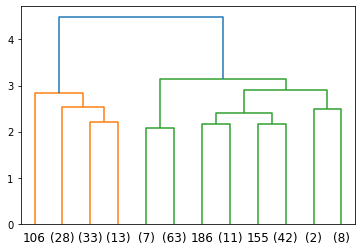

In [465]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 12,
                 )

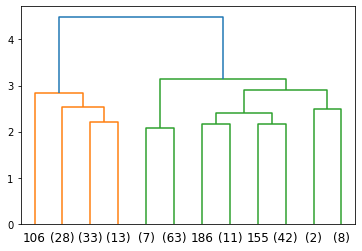
**Dendogram after Trancating**

- To create Dendrogram & use linkage method, we have used the package scipy.cluster.hierarchy.
- Linkage method used is the Average linkage. 
- The Dendrogram formed by using this method is as shown above and also Dendrogram image after truncating is also shown.
- From the Dendrogram we see that there are 2 colored clusters formed and hence we split the data into 2 clusters. With Green Color having the maximum number of data points and Orange Cluster having the minimum number data points
- To Split the data we use Fcluster from package scipy.cluster.hierarchy and when calling function we use criterion as maxclust
- Once the data is split we will then include this in out orginal data
- Original data with Clusters column included is as shown below

In [466]:
from scipy.cluster.hierarchy import fcluster

In [467]:
clusters = fcluster(link_method, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1], dtype=int32)

In [468]:
bank1 = bank.copy()

In [469]:
bank1['clusters'] = clusters

In [470]:
bank1.head(8)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,2


| |   spending  |  advance_payments  |  probability_of_full_payment  |  current_balance  |  credit_limit  |  min_payment_amt  |  max_spent_in_single_shopping  |  clusters | 
| --|--- |--- |--- |--- |--- |--- |--- |---  |
| 0  |  19.94  |  16.92  |  0.8752  |  6.675  |  3.763  |  3.252  |  6.550  |  1 | 
| 1  |  15.99  |  14.89  |  0.9064  |  5.363  |  3.582  |  3.336  |  5.144  |  2 | 
| 2  |  18.95  |  16.42  |  0.8829  |  6.248  |  3.755  |  3.368  |  6.148  |  1 | 
| 3  |  10.83  |  12.96  |  0.8099  |  5.278  |  2.641  |  5.182  |  5.185  |  2 | 
| 4  |  17.99  |  15.86  |  0.8992  |  5.890  |  3.694  |  2.068  |  5.837  |  1 | 
| 5  |  12.70  |  13.41  |  0.8874  |  5.183  |  3.091  |  8.456  |  5.000  |  2 | 
| 6  |  12.02  |  13.33  |  0.8503  |  5.350  |  2.810  |  4.271  |  5.308  |  2 | 
| 7  |  13.74  |  14.05  |  0.8744  |  5.482  |  3.114  |  2.932  |  4.825  |  2   | 

### Question 1.4 
Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [471]:
from sklearn.cluster import KMeans 

In [472]:
wss =[] 

In [473]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(bank_scaled)
    wss.append(KM.inertia_)

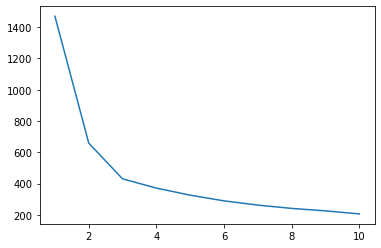

In [474]:
plt.plot(range(1,11), wss)

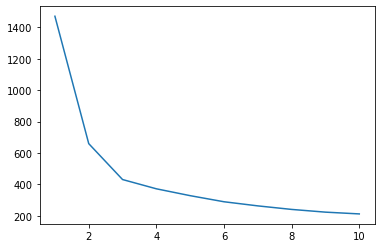
**KMeans Inertia Values Plot**

- The Above plot will help us to identify number of Clusters that can be considered
- From the Above plot we see that we can use 3 Cluster as the there is no significant change if cluster size is taken as 4 or more

In [475]:
KM = KMeans(n_clusters=3)
KM.fit(bank_scaled)


KMeans(n_clusters=3)

In [476]:
labels = KM.labels_

In [477]:
bank["Clusters"] = labels

In [478]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


In [479]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [480]:
silhouette_score(bank_scaled,labels)

0.4007270552751299

In [481]:
sil_width = silhouette_samples(bank_scaled,labels)

In [482]:
bank["sil_width"] = sil_width
bank.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2,0.362276


|   spending  |  advance_payments  |  probability_of_full_payment  |  current_balance  |  credit_limit  |  min_payment_amt  |  max_spent_in_single_shopping  |  Clusters  |  sil_width | 
|--- |--- |--- |--- |--- |--- |--- |--- |---  |
| 19.94  |  16.92  |  0.8752  |  6.675  |  3.763  |  3.252  |  6.550  |  0  |  0.573699 | 
|15.99  |  14.89  |  0.9064  |  5.363  |  3.582  |  3.336  |  5.144  |  2  |  0.366386 | 
| 18.95  |  16.42  |  0.8829  |  6.248  |  3.755  |  3.368  |  6.148  |  0  |  0.637784 | 
| 10.83  |  12.96  |  0.8099  |  5.278  |  2.641  |  5.182  |  5.185  |  1  |  0.512458 | 
|  17.99  |  15.86  |  0.8992  |  5.890  |  3.694  |  2.068  |  5.837  |  0  |  0.362276   |

In [483]:
silhouette_samples(bank_scaled,labels).min()

0.002713089347678533

- All the Clusters on an average have a Silhouette Score of 0.4.
- The minimum value of Silhouette score is 0.002. This indicates that all the Samples are correctly mapped to their clusters.
- The Sil_Width and the Clusters are added to the original Data and is as shown above.


### Question 1.5 
Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [484]:
bank.Clusters.value_counts().sort_index()

0    72
1    71
2    67
Name: Clusters, dtype: int64

In [485]:
clust_profile=pd.DataFrame()
clust_profile=bank.groupby('Clusters').mean()
clust_profile['freq']=bank.Clusters.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,freq
Clusters,,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,0.397473,72
1,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,0.339816,71
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,0.468772,67


|   |    spending  |  advance_payments  |  prob_of_full_payment  |  current_balance  |  credit_limit  |  min_payment_amt  |  max_spent_single_shopping  |  sil_width  |  freq | 
|--- |--- |--- |--- |--- |--- |--- |--- |--- |---  |
| **Clusters**  |    |    |    |    |    |    |    |    |   | 
| **0**  |  18.495373  |  16.203433  |  0.884210  |  6.175687  |  3.697537  |  3.632373  |  6.041701  |  0.468772  |  67 | 
| **1**  |  11.856944  |  13.247778  |  0.848253  |  5.231750  |  2.849542  |  4.742389  |  5.101722  |  0.397473  |  72 | 
| **2**  |  14.437887  |  14.337746  |  0.881597  |  5.514577  |  3.259225  |  2.707341  |  5.120803  |  0.339816  |  71   | 


**Cluster 0**: Highest Spending, Advance Payments,highest probability of full payment, current balance, credit limit and max spending in single shopping

**Cluster 1**: Lowest Spending, advance payments probability of full payment, current balance, credit limit and max spent in single shopping but has the highest mini payment amount 

**Cluster 2**: The intermidiate range Customers belong to this Cluster but has the lowest mini-payment amount.

- Cluster 0 are the high end Customers who spend good amount every month. Securing them within Cluster 0 is top priority. So offers are to be made in such a way that they do not end up thinking otherwise.
- Cluster 1 is the the low end Customer who doesn't want to spend much. they maintain a low credit balance which indicate majority of the amount they spend through Credit card rather than paying with Cash. about 84 % of the Customer pay back to Bank which indicates that the they have a steady income. Cluster 1 has the highest number of Customer who pay a minimum amount to bank every month. Targeted Offers are to be made to them so that they can be observed in Cluster 2 (Intermediate Range)
- Cluster 2 are the Intermidiate Group of Customer. They have an Average spending and maintain average Credit limit. More offers are to be given to them so that they end up in Cluster 0 or High end Customers. 
- Cluster 2 has least amount of customers that end up paying minimum amount to bank and also 88% of this group pay in full payment to bank.

# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### Question 2.1
Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [486]:
insurance = pd.read_csv("insurance_part2_data.csv")

In [487]:
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


|   |  Age  |  Agency_Code  |  Type  |  Claimed  |  Commision  |  Channel  |  Duration  |  Sales  |  Product Name  |  Destination | 
|:--|:-|--- |--- |--- |--- |--- |--- |--- |--- |---  |
| 0  |  48  |  C2B  |  Airlines  |  No  |  0.70  |  Online  |  7  |  2.51  |  Customised Plan  |  ASIA | 
| 1  |  36  |  EPX  |  Travel Agency  |  No  |  0.00  |  Online  |  34  |  20.00  |  Customised Plan  |  ASIA | 
| 2  |  39  |  CWT  |  Travel Agency  |  No  |  5.94  |  Online  |  3  |  9.90  |  Customised Plan  |  Americas | 
| 3  |  36  |  EPX  |  Travel Agency  |  No  |  0.00  |  Online  |  4  |  26.00  |  Cancellation Plan  |  ASIA | 
| 4  |  33  |  JZI  |  Airlines  |  No  |  6.30  |  Online  |  53  |  18.00  |  Bronze Plan  |  ASIA | 

**Part of Insurance Data that is being Worked on**


1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

Above is the Dataset Columns and its understandings

In [488]:
print("no. of rows: ",insurance.shape[0], "\n""no. of columns: ",insurance.shape[1])

no. of rows:  3000 
no. of columns:  10


- There are over 3000 Rows and 10 Columns in the given Data

In [489]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


|   | Columns | Non-Null values | Datatypes    |
| --- | ------     |   --------------|  -----   | 
|  0  | Age   |        3000 non-null |  int64   | 
|  1  |  Agency_Code |  3000 non-null |  object  | 
|  2  | Type        |  3000 non-null  | object  | 
|  3  | Claimed   |    3000 non-null |  object  | 
|  4  | Commision |    3000 non-null |   float64 | 
|  5  | Channel     |  3000 non-null |  object  | 
|  6  | Duration  |    3000 non-null |   int64   | 
|  7  | Sales     |    3000 non-null |  float64 | 
|  8  | Product Name |  3000 non-null |  object  | 
|  9  | Destination  | 3000 non-null |  object  | 

**Data columns (total 10 columns)**

**dtypes: float64(2), int64(2), object(6)**

In [490]:
round(insurance.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.09,10.46,8.0,32.0,36.00,42.00,84.00
Commision,3000.0,14.53,25.48,0.0,0.0,4.63,17.24,210.21
Duration,3000.0,70.00,134.05,-1.0,11.0,26.50,63.00,4580.00
Sales,3000.0,60.25,70.73,0.0,20.0,33.00,69.00,539.00


|   |  count  |  mean  |  std  |  min  |  25%  |  50%  |  75%  |  max | 
|--- |--- |--- |--- |--- |--- |--- |--- |---  |
| **Age**  |  3000.0  |  38.09  |  10.46  |  8.0  |  32.0  |  36.00  |  42.00  |  84.00 | 
| **Commision**  |  3000.0  |  14.53  |  25.48  |  0.0  |  0.0  |  4.63  |  17.24  |  210.21 | 
| **Duration**  |  3000.0  |  70.00  |  134.05  |  -1.0  |  11.0  |  26.50  |  63.00  |  4580.00 | 
| **Sales**  |  3000.0  |  60.25  |  70.73  |  0.0  |  20.0  |  33.00  |  69.00  |  539.00 | 

</t       > **Description of the Numeric data**

In [491]:
insurance.duplicated().sum()

139

- There are a total of 139 Duplicate Rows present in the Dataset given.
- We need to drop them before proceeding with implementing Machine Learning Models
- Now the Dataset will have 139 less values than it's original 
- We can also see that there is a negative value in the Duration which is false. We will also need to treat that Anomaly

In [492]:
insurance.drop_duplicates(inplace=True)

In [493]:
insurance[insurance['Duration'] == -1]
#np.where(insurance.Duration == -1, 26.50, insurance.Duration)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


| | Age  |  Agency_Code  |  Type  |  Claimed  |  Commision  |  Channel  |  Duration  |  Sales  |  Product Name  |  Destination |
| --|--- |--- |--- |--- |--- |--- |--- |--- |--- |---  | 
| 1508  |  25  |  JZI  |  Airlines  |  No  |  6.3  |  Online  |  -1  |  18.0  |  Bronze Plan  |  ASIA | 

- We observe a negative duration at row 1508. We will replace the median value

In [494]:
insurance["Duration"] =np.where(insurance["Duration"] == -1, 26.50, insurance['Duration'])

In [495]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 245.9+ KB


|   | Columns | Non-Null values | Datatypes    |
| --- | ------     |   --------------|  -----   | 
|  0  | Age   |        2861 non-null |  int64   | 
|  1  |  Agency_Code |  2861 non-null |  object  | 
|  2  | Type        |  2861 non-null  | object  | 
|  3  | Claimed   |    2861 non-null |  object  | 
|  4  | Commision |    2861 non-null |   float64 | 
|  5  | Channel     |  2861 non-null |  object  | 
|  6  | Duration  |    2861 non-null |   int64   | 
|  7  | Sales     |    2861 non-null |  float64 | 
|  8  | Product Name |  2861 non-null |  object  | 
|  9  | Destination  | 2861 non-null |  object  | 

- **Data columns (total 10 columns)**
- **2861 Non Null Values in total**
- **dtypes: float64(2), int64(2), object(6)**

In [496]:
round(insurance.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.20,10.68,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.08,25.83,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,72.13,135.97,0.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.76,71.40,0.0,20.0,33.50,69.30,539.00


| | count  |  mean  |  std  |  min  |  25%  |  50%  |  75%  |  max | 
|---------|--- |--- |--- |--- |--- |--- |--- |---  |
| **Age**  |  2861.0  |  38.20  |  10.68  |  8.0  |  31.0  |  36.00  |  43.00  |  84.00 | 
| **Commision**  |  2861.0  |  15.08  |  25.83  |  0.0  |  0.0  |  5.63  |  17.82  |  210.21 | 
| **Duration**  |  2861.0  |  72.12  |  135.98  |  0.0  |  12.0  |  28.00  |  66.00  |  4580.00 | 
| **Sales**  |  2861.0  |  61.76  |  71.40  |  0.0  |  20.0  |  33.50  |  69.30  |  539.00 | 

**Description of numeric part of Data after Duplicate  rows are Dropped**

- After dropping the Duplicate rows, mean values increased compared to when duplicated rows were still part of data. 
- Change of means will sometimes significantly impact model building Hence we need to drop the duplicate rows

**UNIVARIATE ANALYSIS**

In [497]:
insurance_num = insurance.select_dtypes(include = ['float64', 'int64'])
numericcolumn = list(insurance_num.columns.values)
len(numericcolumn)

4

In [498]:
def univariate_Analysis_numeric(column,nbins):
    print("Description of " + column)
    print("\n")
    print(insurance_num[column].describe(),end=' ')
    print("\n")
    
    plt.figure()
    print("Distribution of " + column)
    print("\n")
    sns.histplot(insurance_num[column], kde=False, color='g');
    plt.show()
    print("\n")
    plt.figure()
    print("BoxPlot of " + column)
    print("\n")
    ax = sns.boxplot(x=insurance_num[column])
    plt.show()

Description of Age


count    2861.000000
mean       38.204124
std        10.678106
min         8.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        84.000000
Name: Age, dtype: float64 

Distribution of Age




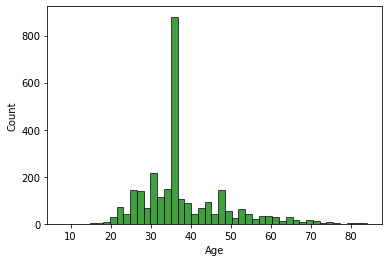



BoxPlot of Age




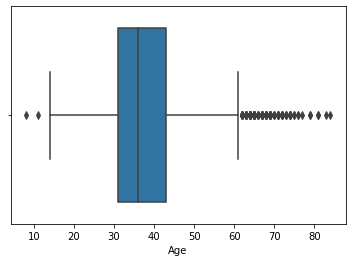

Description of Commision


count    2861.000000
mean       15.080996
std        25.826834
min         0.000000
25%         0.000000
50%         5.630000
75%        17.820000
max       210.210000
Name: Commision, dtype: float64 

Distribution of Commision




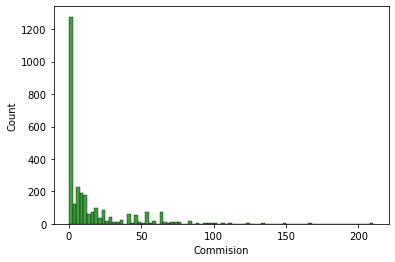



BoxPlot of Commision




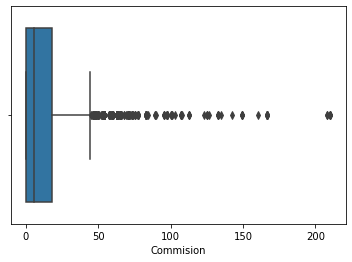

Description of Duration


count    2861.000000
mean       72.129850
std       135.973001
min         0.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64 

Distribution of Duration




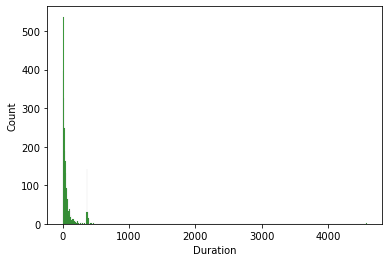



BoxPlot of Duration




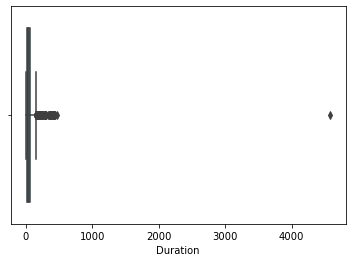

Description of Sales


count    2861.000000
mean       61.757878
std        71.399740
min         0.000000
25%        20.000000
50%        33.500000
75%        69.300000
max       539.000000
Name: Sales, dtype: float64 

Distribution of Sales




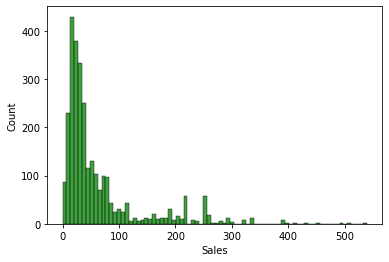



BoxPlot of Sales




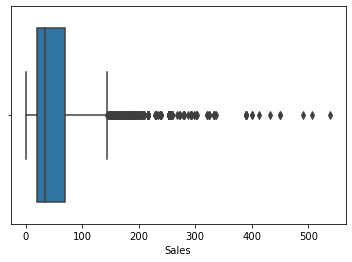

In [499]:
for x in numericcolumn:
    univariate_Analysis_numeric(x,20)

| | Description of Age |
|--- |---  |
| mean |      38.204124 | 
| std     |   10.678106 | 
| min    |     8.000000 | 
| 25%  |      31.000000 | 
| 50%  |      36.000000 | 
| 75%  |      43.000000 | 
| max  |      84.000000 | 

**Distribution of Age**
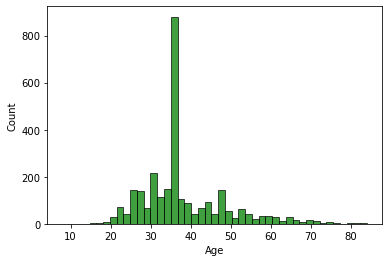
**BoxPlot of Age**
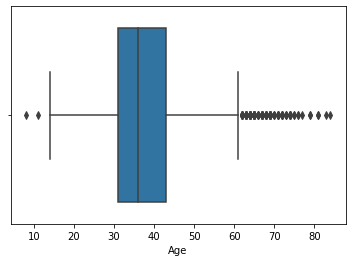

**We observe the follow from the Distribution plot and Bloxplot of Age**
- 75% of the Group falls under 45 years old.
- We observe a large number of Outliers.

| | Description of Commision |
|--- |---  |
| mean  |     15.080996 | 
| std      |  25.826834 | 
| min     |    0.000000 | 
| 25%   |      0.000000 | 
| 50%   |      5.630000 | 
| 75%   |     17.820000 | 
| max   |    210.210000 | 

**Distribution of Commision**
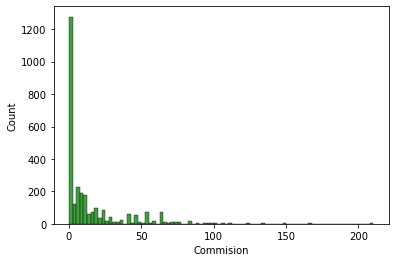
**BoxPlot of Commision**
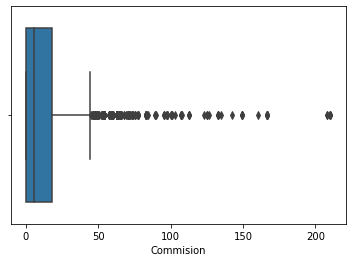

**We observe the follow from the Distribution plot and Bloxplot of Commision** 
- We observed that on an average Commission of 15.08 units were taken and 75% of the crowd claims receive less than 17.62 units
- We observed that the data for Commission is Right Skewed.

| | Description of Duration |
|--- |---  |
| mean |      72.120238 | 
| std     |  135.977200 | 
| min    |     0.000000 | 
| 25%   |     12.000000 | 
| 50%   |     28.000000 | 
| 75%   |     66.000000 | 
| max   |   4580.000000 | 

**Distribution of Duration**
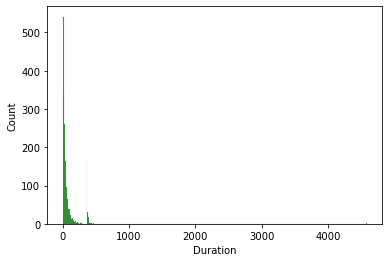
**BoxPlot of Duration**
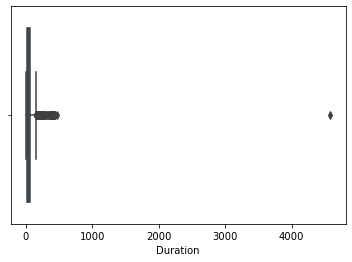

**We observe the follow from the Distribution plot and Bloxplot of Duration**
- We observed that on an average Duration spent is approximately 72 days
- We See only one Outlier( one Customer) who's travel duration is 4580 days.

| |Description of Sales |
|--- |---  |
| mean |       61.757878 | 
| std     |   71.399740 | 
| min    |     0.000000 | 
| 25%  |      20.000000 | 
| 50%  |      33.500000 | 
| 75%  |      69.300000 | 
| max  |     539.000000 |

**Distribution of Sales**
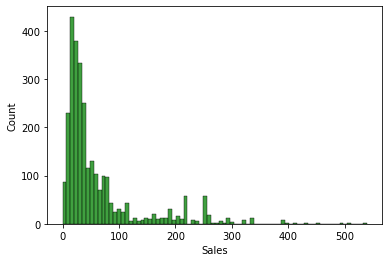
**BoxPlot of Sales**
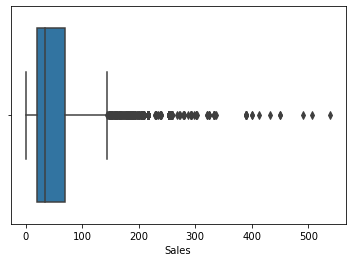

**We observe the follow from the Distribution plot and Bloxplot of Sales**
- We observed that the average Sales on tour insurance policies is approx 71.4 units.
- Data on Sales is Right Skewed

**BI-VARIATE ANALYSIS**

In [500]:
corr = insurance_num.corr(method='pearson')

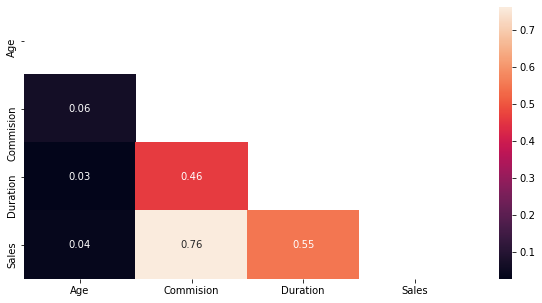

In [501]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10, 5))
sns.heatmap(insurance_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

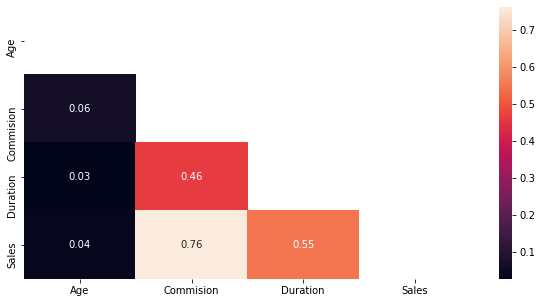
**Heat Map**
- We observe from the above data that there is high coorelation between Sales and Commission & Sales and Duration
- There is very little or no coorelation between Age and any of the other numeric factors

**MULTI-VARIATE ANALYSIS**

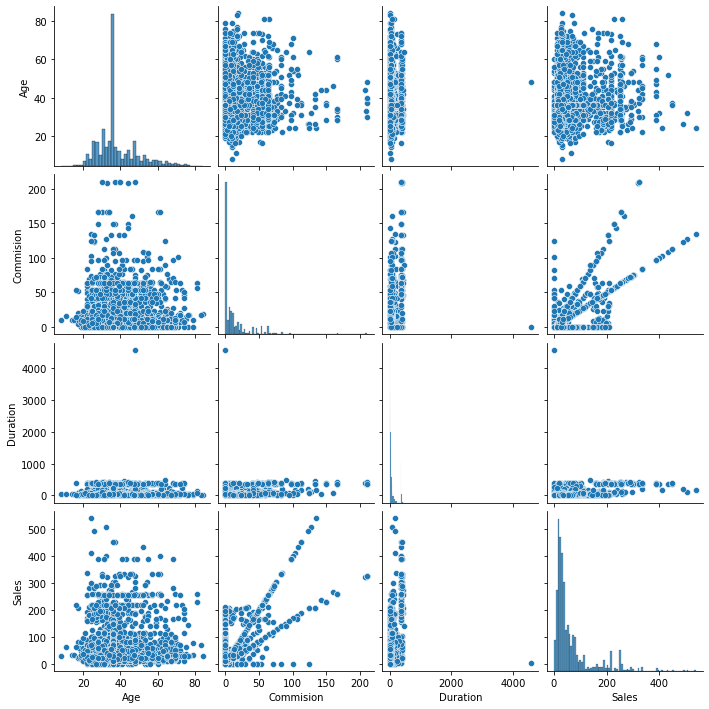

In [502]:
sns.pairplot(data=insurance_num);

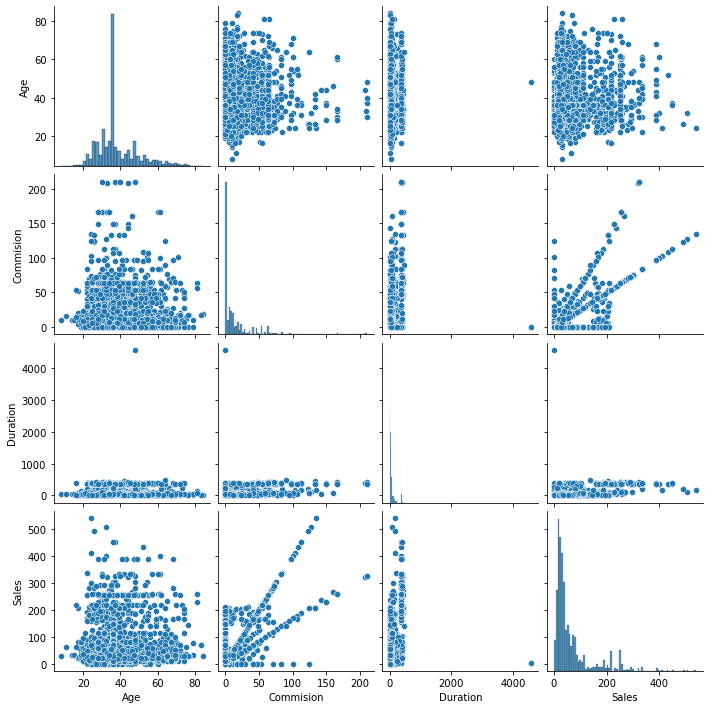
**Pair Plot of the Numberic Data**

### Question 2.2 
Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [503]:
for feature in insurance.columns: 
    if insurance[feature].dtype == 'object':
        insurance[feature] = pd.Categorical(insurance[feature]).codes

In [504]:
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,0,0.00,1,34.0,20.00,2,0
2,39,1,1,0,5.94,1,3.0,9.90,2,1
3,36,2,1,0,0.00,1,4.0,26.00,1,0
4,33,3,0,0,6.30,1,53.0,18.00,0,0


|   |  Age  |  Agency_Code  |  Type  |  Claimed  |  Commision  |  Channel  |  Duration  |  Sales  |  Product Name  |  Destination |
|--- |--- |--- |--- |--- |--- |--- |--- |--- |--- |---  |
| 0  |  48  |  0  |  0  |  0  |  0.70  |  1  |  7.0  |  2.51  |  2  |  0 | 
| 1  |  36  |  2  |  1  |  0  |  0.00  |  1  |  34.0  |  20.00  |  2  |  0 | 
| 2  |  39  |  1  |  1  |  0  |  5.94  |  1  |  3.0  |  9.90  |  2  |  1 | 
| 3  |  36  |  2  |  1  |  0  |  0.00  |  1  |  4.0  |  26.00  |  1  |  0 | 
| 4  |  33  |  3  |  0  |  0  |  6.30  |  1  |  53.0  |  18.00  |  0  |  0 | 

- Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 
- We convert each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category or code.
- Once converting, the dataset is as shown above.
- Data types of the columns will be changed and is as shown below.

In [505]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(3), int64(1), int8(6)
memory usage: 128.5 KB


|   | Columns | Non-Null values | Datatypes    |
| --- | ------     |   --------------|  -----   | 
|  0  | Age   |        2861 non-null |  int64   | 
|  1  |  Agency_Code |  2861 non-null |  int8  | 
|  2  | Type        |  2861 non-null  | int8  | 
|  3  | Claimed   |    2861 non-null |  int8  | 
|  4  | Commision |    2861 non-null |   float64 | 
|  5  | Channel     |  2861 non-null |  int8  | 
|  6  | Duration  |    2861 non-null |   float64   | 
|  7  | Sales     |    2861 non-null |  float64 | 
|  8  | Product Name |  2861 non-null |  int8  | 
|  9  | Destination  | 2861 non-null |  int8  | 

- **Data columns (total 10 columns)**
- **2861 Non Null Values in total**
- **dtypes: float64(3), int64(1), int8(6)**

In [506]:
X = insurance.drop("Claimed", axis=1)
y = insurance.pop("Claimed")

In [507]:
from sklearn.model_selection import train_test_split

In [508]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

- The Dataset has been Split in to Train Set and Test set.
- I have choosen the test size as 30% and train set as 70% of the Data set. 
- Random state being used is 1

**CLASSIFICATION MODEL - CART**

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [177]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [181]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [182]:
from sklearn import tree

train_char_label = ['No', 'Yes']
insurance_Tree_File = open('C:\\Users\\DELL\\anaconda3\\Project files\\Assignment\\Data Mining\\insurance_Tree_File_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

insurance_Tree_File.close()

Over grown Decision Tree is as shown
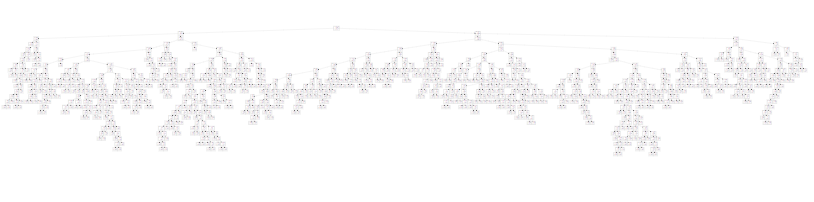

**Regularising the Decision Tree**

In [301]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=30,random_state= 25 )
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=30,
                       random_state=25)

In [293]:
insurance_tree_regularized = open('C:\\Users\\DELL\\anaconda3\\Project files\\Assignment\\Data Mining\\insurance_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= insurance_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

insurance_tree_regularized.close()

Pruned Decision Tree with Max depth of 9
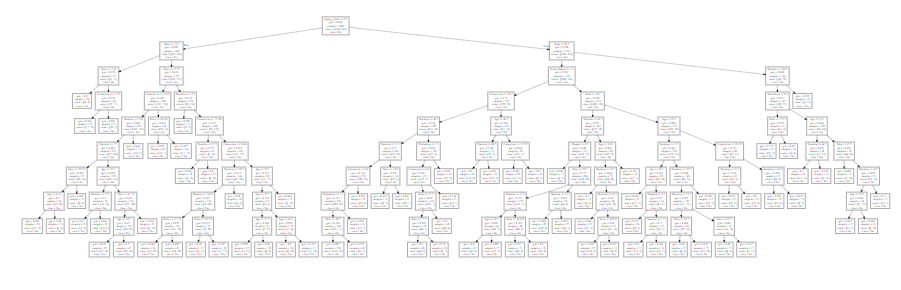

In [302]:
ytrain_predict_cart = reg_dt_model.predict(X_train)
ytest_predict_cart = reg_dt_model.predict(X_test)

In [303]:
print(classification_report(train_labels,ytrain_predict_cart))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1359
           1       0.72      0.65      0.68       643

    accuracy                           0.80      2002
   macro avg       0.78      0.76      0.77      2002
weighted avg       0.80      0.80      0.80      2002



|  | Precision | Recall | F1-Score | Support |
|---: |---  | --- | ---| --- |
|  | 
|            0 |       0.84   |   0.88    |  0.86  |    1359 | 
|            1  |     0.72 |     0.65   |   0.68   |    643 | 
|  | 
|     accuracy      | | |                     0.80  |    2002 | 
|    macro avg    |   0.78  |    0.76    |  0.77  |    2002 | 
| weighted avg   |    0.80    |  0.80   |   0.80   |   2002 | 

**Classification Table for CART model on Train set using max_depth=9, min_samples_leaf=10, min_samples_split=30**
- We see Precision is 72% and Recall is 65% and Fscore is .68 

In [304]:
print(classification_report(test_labels,ytest_predict_cart))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       588
           1       0.65      0.62      0.63       271

    accuracy                           0.77       859
   macro avg       0.74      0.73      0.73       859
weighted avg       0.77      0.77      0.77       859



|  | Precision | Recall | F1-Score | Support |
|---: |---  | --- | ---| --- |
|  | 
|            0   |    0.83  |    0.84 |     0.84 |      588 | 
|            1      | 0.65     | 0.62     | 0.63    |   271 | 
|  | 
|     accuracy   |    |   |                        0.77   |    859 | 
|    macro avg   |    0.74    |  0.73   |   0.73     |  859 | 
| weighted avg    |   0.77  |    0.77  |    0.77   |    859 | 

**Classification Table for CART model on Test set using max_depth=9, min_samples_leaf=10, min_samples_split=30**
- We see Precision is 64% and Recall is 57% and Fscore is .61

In [386]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [ 7,8, 9],
    'min_samples_leaf': [15, 20],
    'min_samples_split': [ 30, 45, 50]
}

dt_model = DecisionTreeClassifier()

grid_search1 = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [387]:
grid_search1.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [15, 20],
                         'min_samples_split': [30, 45, 50]})

After applying Grid search, the best parameters are max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 60

In [388]:
grid_search1.best_params_

{'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 50}

In [389]:
best_grid1 = grid_search1.best_estimator_

In [390]:
ytrain_predict_cart1 = best_grid1.predict(X_train)
ytest_predict_cart1 = best_grid1.predict(X_test)

In [391]:
from sklearn.metrics import classification_report

In [392]:
print(classification_report(train_labels,ytrain_predict_cart1))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1359
           1       0.70      0.59      0.64       643

    accuracy                           0.79      2002
   macro avg       0.76      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



|  | Precision | Recall | F1-Score | Support |
|---: |---  | -----| --  | --- |
|  | 
|            0    |   0.82 |     0.88 |     0.85  |    1359 | 
|            1   |    0.70 |     0.59  |    0.64  |     643 | 
|  | 
|     accuracy |             |             |    0.79   |   2002 | 
|    macro avg  |     0.76   |   0.74   |   0.75  |    2002 | 
| weighted avg  |     0.78 |     0.79 |     0.78  |     2002 | 

**Classification Table for CART model on Train set using Grid Search**

In [319]:
print(classification_report(test_labels,ytest_predict_cart1))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       588
           1       0.64      0.54      0.58       271

    accuracy                           0.76       859
   macro avg       0.72      0.70      0.71       859
weighted avg       0.75      0.76      0.75       859



|  | Precision | Recall | F1-Score | Support |
|---: |---  | -----| --  | --- |
|  | 
|            0    |   0.80 |     0.86 |     0.83  |    588 | 
|            1   |    0.64 |     0.54  |    0.58  |     271 | 
|  | 
|     accuracy |             |             |    0.76   |   859 |  
|    macro avg  |     0.72   |   0.70   |   0.71  |    859 | 
| weighted avg |      0.75 |     0.76 |     0.75  |     859 | 

**Classification Table for CART model on Test set using Grid Search**
- We see Precision is 64% and Recall is 54% and Fscore is 58%

**RANDOM FOREST CLASSIFIER**

In [320]:
rfcl1 = RandomForestClassifier(n_estimators = 501, max_depth= 9, max_features=4, min_samples_leaf= 50, min_samples_split=151,random_state=25)
rfcl1 = rfcl1.fit(X_train, train_labels)

In [321]:
ytrain_predict_rand1 = rfcl1.predict(X_train)
ytest_predict_rand1 = rfcl1.predict(X_test)

In [323]:
print(classification_report(train_labels,ytrain_predict_rand1))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1359
           1       0.69      0.51      0.59       643

    accuracy                           0.77      2002
   macro avg       0.74      0.70      0.71      2002
weighted avg       0.76      0.77      0.76      2002



|  | Precision | Recall | F1-Score | Support |
|---: |---  | -----| --  | --- |
|  | 
| 0              | 0.80 | 0.89 |  0.84 |  1359 |
|            1    |   0.69     | 0.51 |     0.59    |   643 | 
|  |  
|     accuracy     |        |        |       0.77 |     2002 | 
|    macro avg  |     0.74     | 0.70  |    0.71   |   2002 | 
| weighted avg |      0.76   |   0.77 |     0.76 |     2002 | 

**Classification Table for Random Forest method on Train Dataset**

In [324]:
print(classification_report(test_labels,ytest_predict_rand1))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       588
           1       0.69      0.51      0.59       271

    accuracy                           0.78       859
   macro avg       0.75      0.70      0.72       859
weighted avg       0.77      0.78      0.76       859



|  | Precision | Recall | F1-Score | Support |
|---: |---  | -----| --  | --- |
|  |  
|            0     |  0.80   |   0.90  |    0.84    |   588 | 
|            1     |  0.69  |    0.51   |   0.59   |    271 | 
|  | 
|     accuracy |               |       |        0.78   |    859 | 
|    macro avg |       0.74  |    0.70  |     0.72  |      859 | 
| weighted avg |      0.77  |    0.78  |    0.76   |    859 | 

**Classification Table for Random Forest method on Test Dataset**

In [393]:
param_grid = {
    'max_depth': [7,8,9],
    'max_features': [3, 4, 5],
    'min_samples_leaf': [45],
    'min_samples_split': [100,151],
    'n_estimators': [251]
}

rfcl = RandomForestClassifier()

grid_search2 = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [394]:
grid_search2.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8, 9], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [45],
                         'min_samples_split': [100, 151],
                         'n_estimators': [251]})

In [395]:
grid_search2.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_leaf': 45,
 'min_samples_split': 100,
 'n_estimators': 251}

In [396]:
best_grid2 = grid_search2.best_estimator_

In [397]:
ytrain_predict_rand2 = best_grid2.predict(X_train)
ytest_predict_rand2 = best_grid2.predict(X_test)

In [330]:
print(classification_report(train_labels,ytrain_predict_rand2))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1359
           1       0.71      0.52      0.60       643

    accuracy                           0.78      2002
   macro avg       0.75      0.71      0.72      2002
weighted avg       0.77      0.78      0.77      2002



|  | Precision | Recall | F1-Score | Support |
|---: |---  | -----| --  | --- |
|  |  
|            0   |    0.80    |  0.90 |    0.85    |  1359 | 
|            1    |   0.71   |   0.52   |   0.60   |    643 | 
|  | 
|     accuracy       |           |      |   0.78     | 2002 | 
|    macro avg     |  0.75   |   0.71      |0.72    |  2002 | 
| weighted avg   |    0.77  |    0.78    |  0.77   |   2002 | 

**Classification Table for Random Forest method using Grid Search on Train Dataset**

In [331]:
print(classification_report(test_labels,ytest_predict_rand2))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       588
           1       0.70      0.50      0.58       271

    accuracy                           0.77       859
   macro avg       0.75      0.70      0.71       859
weighted avg       0.76      0.77      0.76       859



|  | Precision | Recall | F1-Score | Support |
|---: |---  | -----| --  | --- |
|  |  
|            0   |    0.80    |  0.90  |    0.84    |   588 | 
|            1    |   0.70   |   0.50   |   0.58  |     271 | 
|  | 
|     accuracy   |                |           |  0.77    |   859 | 
|    macro avg  |     0.75    |  0.70  |    0.71  |     859 | 
| weighted avg |      0.76   |   0.77  |    0.76 |      859 | 

**Classification Table for Random Forest method using Grid Search on Test Dataset**
- We see that Precision is 70% and recoil is 50% and Fscore is at 0.58

**MLP CLASSIFIER (ARTIFICIAL NEURAL NETWORKS- ANN)**

In [509]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state=25)

In [510]:
sc = StandardScaler() 
X_trains = sc.fit_transform(x_train) 
X_tests = sc.transform (x_test)

In [540]:
clf = MLPClassifier(hidden_layer_sizes=[100 , 100 ,100], max_iter=500,
                     solver='adam', verbose=True,  random_state=25,tol=0.001)

In [541]:
clf.fit(X_trains, train_labels)


Iteration 1, loss = 0.65721045
Iteration 2, loss = 0.63043392
Iteration 3, loss = 0.62640631
Iteration 4, loss = 0.62534246
Iteration 5, loss = 0.62524242
Iteration 6, loss = 0.62431495
Iteration 7, loss = 0.62492653
Iteration 8, loss = 0.62535981
Iteration 9, loss = 0.62503237
Iteration 10, loss = 0.62421306
Iteration 11, loss = 0.62474172
Iteration 12, loss = 0.62252260
Iteration 13, loss = 0.62235085
Iteration 14, loss = 0.62182786
Iteration 15, loss = 0.62160233
Iteration 16, loss = 0.62118945
Iteration 17, loss = 0.62042197
Iteration 18, loss = 0.62048176
Iteration 19, loss = 0.62303852
Iteration 20, loss = 0.62591846
Iteration 21, loss = 0.62577801
Iteration 22, loss = 0.62291349
Iteration 23, loss = 0.61914578
Iteration 24, loss = 0.61848051
Iteration 25, loss = 0.61988883
Iteration 26, loss = 0.61846964
Iteration 27, loss = 0.61854625
Iteration 28, loss = 0.61519926
Iteration 29, loss = 0.61548957
Iteration 30, loss = 0.61492111
Iteration 31, loss = 0.61373423
Iteration 32, los

MLPClassifier(hidden_layer_sizes=[100, 100, 100], max_iter=500, random_state=25,
              tol=0.001, verbose=True)

In [542]:
ytrain_predict_mlp = clf.predict(X_trains)
ytest_predict_mlp = clf.predict(X_tests)

In [543]:
print(classification_report(train_labels,ytrain_predict_mlp))

              precision    recall  f1-score   support

           0       0.69      0.99      0.81      1359
           1       0.73      0.07      0.12       643

    accuracy                           0.69      2002
   macro avg       0.71      0.53      0.47      2002
weighted avg       0.70      0.69      0.59      2002



|  | Precision | Recall | F1-Score | Support |
|---: |---  | -----| --  | --- |
|  |  
|            0    |   0.69  |    0.99   |   0.81  |    1359 | 
|            1    |   0.73  |   0.07  |    0.12   |    643 | 
|  | 
|     accuracy    |               |            |   0.68   |   2002 | 
|    macro avg   |    0.71   |   0.53   |   0.47  |    2002 | 
| weighted avg  |     0.70 |     0.69  |    0.59   |   2002 | 

**Classification Table for MLP Classifier on Train Set**

In [549]:
print(classification_report(test_labels,ytest_predict))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       588
           1       0.69      0.51      0.59       271

    accuracy                           0.78       859
   macro avg       0.75      0.70      0.72       859
weighted avg       0.77      0.78      0.76       859



|  | Precision | Recall | F1-Score | Support |
|---: |---  | -----| --  | --- |
|  |  
|            0     |  0.80 |     0.90 |     0.85  |     588 | 
|            1     | 0.69   |   0.51   |   0.59  |     271 | 
|  | 
|     accuracy   |              |           |    0.77   |    859 | 
|    macro avg  |     0.75 |   0.70  |    0.72   |    859 | 
| weighted avg |      0.77 |  0.78  |   0.76  |     859 | 

**Classification Table for MLP Classifier on Test Set** 
- Precision is 69% and Recoil is 51% and F1-score is 0.59

In [520]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu', 'sgd'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

rfcl2 = MLPClassifier()

grid_search3 = GridSearchCV(estimator = rfcl2, param_grid = param_grid, cv = 3)

In [521]:
grid_search3.fit(X_trains, train_labels)

C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1027, in fit
    return self._fit(X, y, incremental=(self.warm_start and
  File "C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 321, in _fit
    self._validate_hyperparameters()
  File "C:\Users\DELL\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 419, in _validate_hyperparameters
    raise Value

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu', 'sgd'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [522]:
grid_search3.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'sgd',
 'tol': 0.1}

In [523]:
best_grid3 = grid_search3.best_estimator_

In [524]:
ytrain_predict_mlp1 = best_grid3.predict(X_trains)
ytest_predict_mlp1 = best_grid3.predict(X_tests)

In [525]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1359
           1       0.69      0.51      0.59       643

    accuracy                           0.77      2002
   macro avg       0.74      0.70      0.71      2002
weighted avg       0.76      0.77      0.76      2002



|  | Precision | Recall | F1-Score | Support |
|---: |---  | -----| --  | --- |
|  |  
|            0   |    0.80  |    0.89  |    0.84   |   1359 | 
|            1    |   0.69 |     0.51   |   0.59  |     643 | 
|  | 
|     accuracy    |             |             |  0.77    |  2002 | 
|    macro avg   |    0.74  |    0.70  |    0.71  |    2002 | 
| weighted avg  |     0.76 |     0.77 |    0.76  |    2002 | 

**Classification Report for MLP Classifier using Grid Search on Train Set**

In [526]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       588
           1       0.69      0.51      0.59       271

    accuracy                           0.78       859
   macro avg       0.75      0.70      0.72       859
weighted avg       0.77      0.78      0.76       859



|  | Precision | Recall | F1-Score | Support |
|---: |---  | -----| --  | --- |
|  |  
|            0   |    0.80   |   0.90  |    0.85    |   588 | 
|            1    |   0.69  |    0.51   |   0.59   |    271 | 
|  | 
|     accuracy    |              |             | 0.78       |  859 | 
|    macro avg   |    0.75   |   0.70   |   0.72     |  859 | 
| weighted avg  |     0.77  |    0.78  |    0.76    |   859 | 

**Classification Report for MLP Classifier using Grid Search on Test Set**

### Question 2.3 
Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

**Model Evaluation**

**Measuring AUC-ROC Curve for CART model**

In [411]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

AUC: 0.874


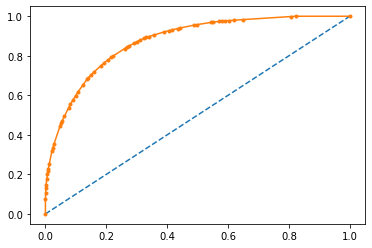

In [412]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

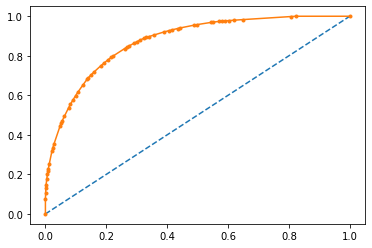
**AUC Score on Train Set for CART model is 0.874**

AUC: 0.771


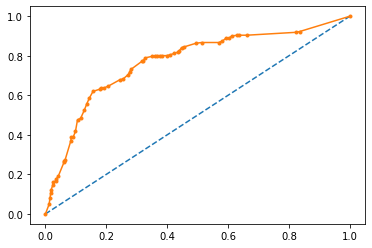

In [410]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

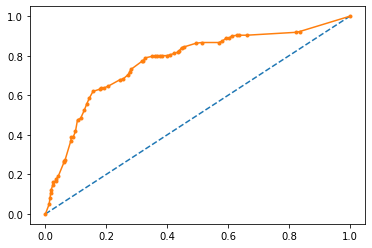
**AUC Score of CART model on test set is 0.771**

AUC: 0.847


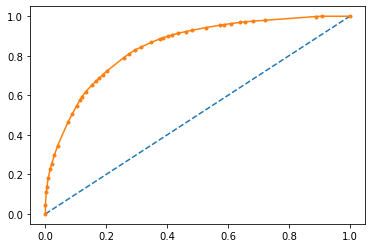

In [405]:
# predict probabilities
probs = best_grid1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

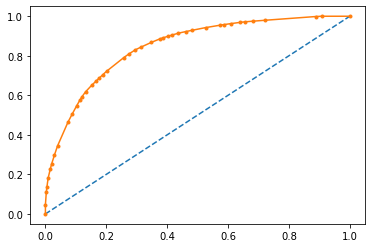
**AUC Score on Train Set for CART model using Grid Search is 0.847**

AUC: 0.770


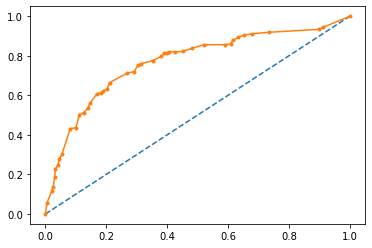

In [413]:
# predict probabilities
probs = best_grid1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

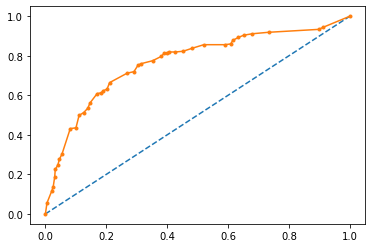
**AUC Score on Test Set for CART model using Grid Search is 0.77**

AUC: 0.818


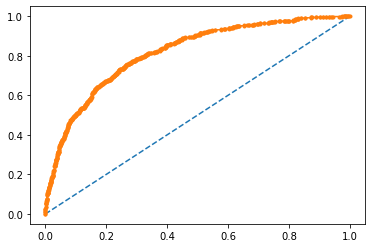

In [406]:
# predict probabilities
probs = rfcl1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

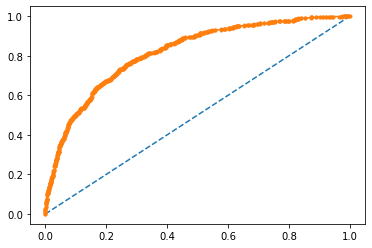
**AUC Score on Train Set for Random Forest model is 0.818**

AUC: 0.820


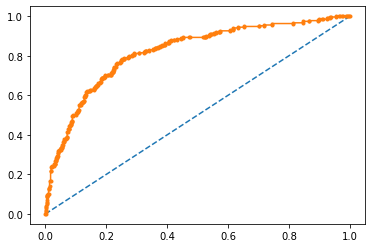

In [414]:
# predict probabilities
probs = rfcl1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

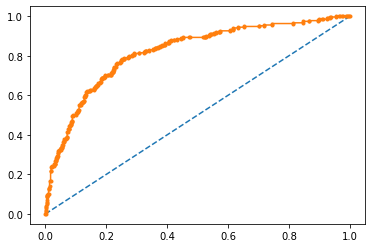
**AUC Score on Test Set for Random Forest model is 0.82**

AUC: 0.825


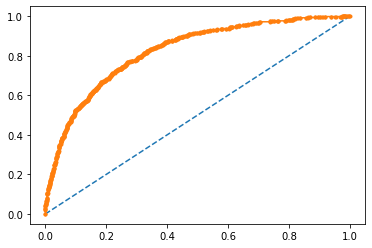

In [407]:
# predict probabilities
probs = best_grid2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

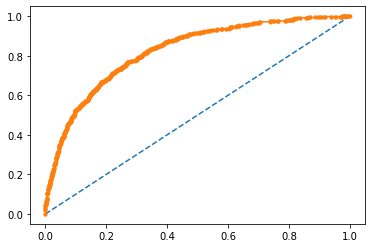
**AUC Score on Train Set for Random Forest model when used Grid Search is 0.825**

AUC: 0.819


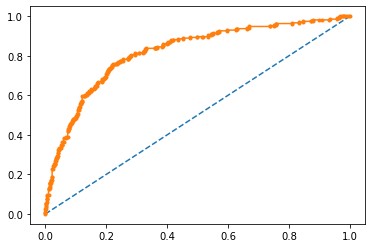

In [415]:
# predict probabilities
probs = best_grid2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

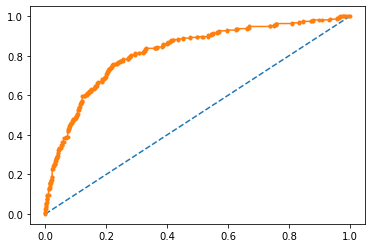
**AUC Score on Test Set for Random Forest model when used Grid Search is 0.819**

AUC: 0.617


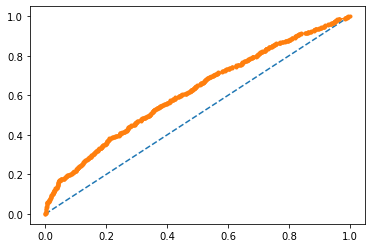

In [545]:
# predict probabilities
probs = clf.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

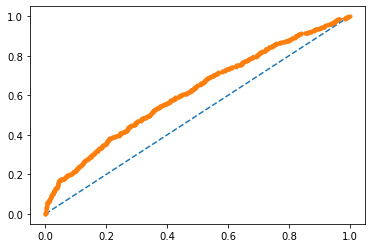
**AUC Score on Train Set for MLP Processor is 0.617**

AUC: 0.477


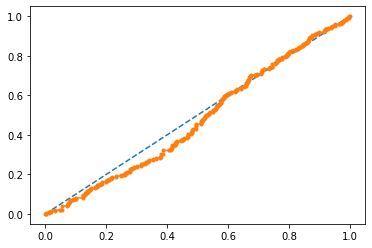

In [546]:
# predict probabilities
probs = clf.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

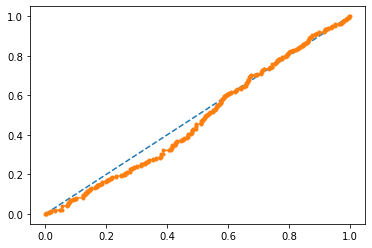
**AUC Score on Test Set for MLP Processor is 0.477**

AUC: 0.503


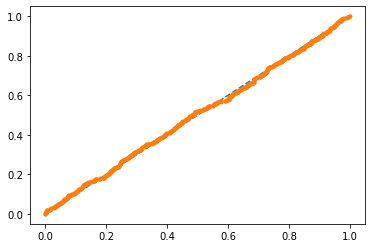

In [547]:
# predict probabilities
probs = best_grid3.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

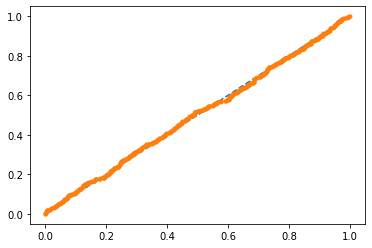
**AUC Score on Train Set for MLP Processor using Grid Search is 0.503**

AUC: 0.522


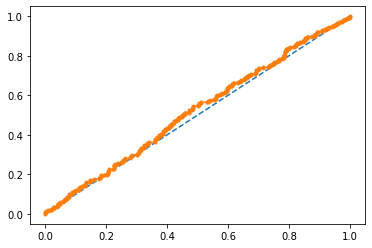

In [548]:
# predict probabilities
probs = best_grid3.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve

fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

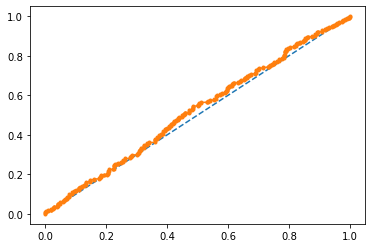
**AUC Score on Train Set for MLP Processor using Grid Search is 0.522**

### Question 2.4 
Final Model: Compare all the models and write an inference which model is best/optimized.

**Classification Table of Test Dataset without Grid Search**

|  Model | Accuracy |Precision | Recall | F1 Score | AUC Score |
|----|---|--|--|--|---|
| CART | 0.77 |0.65| 0.62 | 0.63 | 0.771 |
| Random Forest | 0.78 |  0.69 | 0.51 | 0.59 | 0.82 |
| MLP Processor | 0.77 | 0.69 | 0.51 | 0.59 | 0. 477 |


**Classification Table of Test Dataset with Grid Search**

|  Model | Accuracy | Precision | Recall | F1 Score | AUC Score |
|----|---|--|--|--|  ---|
| CART |  0.76 | 0.64| 0.54 | 0.58 | 0.77 |
| Random Forest | 0.77 |  0.70 | 0.50 | 0.58 | 0.819 |
| MLP Processor | 0.78 | 0.69 | 0.51 | 0.59 | 0. 522 |


- From the above Table we can concure that Precision of any model considered is equal to 70 or less than 70. 
- Recall is close to 0.50. Accuracy of the model is close to 80%.
- We know that higher the F1 score , Better the model. But we see that F1 Score is same for all the models.
- AUC score is calculated for all the models and we see that AUC score for Random Forest Model is the Highest. Which indicates Stong Model. 
- We can prefer Random Forest Model since it has the highest AUC score and has the highest Precision value. 

### Question 2.5 
Inference: Based on the whole Analysis, what are the business insights and recommendations

- We observe that the Accuracy is approximately 77% for all the models. This could be increased with more information and Robust Model. 
- since that the dataset is unbalanced, and so we have a class imbalance problem.
- With Treating Outliers, Model Robustness can be increased but will have to enquire with the company before treating outliers. 
- To build a more robust classification model, this class imbalance needs to be addressed before building the model. This will be applicable to any kind of classification model. Once this issue is addressed and the model is built, further model tuning/optimization using grid search will result in improved performance. This Class imbalance will also be be need to discussed with Company and if access to more data to build a better model. 

**THE END**